# Import Library

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn xgboost skrebate


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#data handling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

#feature selection
from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif
from sklearn.feature_selection import chi2, RFE
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from skrebate import ReliefF

In [3]:
#classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Cross validation
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# performance metrics
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA

import random
from sklearn.utils import check_random_state

# Set the seed for Python's built-in random module
random.seed(42)

# Set the seed for NumPy's random number generator
np.random.seed(42)

# Set the seed for scikit-learn's global random number generator
check_random_state(42)

RandomState(MT19937) at 0x1A686CA7D40

# Load the Data

In [4]:
colorectal_df = pd.read_csv('colorectal_ml_data_lfc.csv')

# Separate the Data into Target and Feature Variable

In [5]:
X = colorectal_df.drop('sample_type', axis=1)
y = colorectal_df['sample_type']

In [6]:
X

,11728232_a_at,11735833_a_at,11719434_a_at,11728234_a_at,11739128_a_at,11732838_at,11715637_a_at,11721993_at,11733581_a_at,11750604_a_at,...,11746954_s_at,11760258_x_at,11718132_at,11720251_at,11724799_x_at,11746772_a_at,11757733_s_at,11757857_s_at,11756083_x_at,11715316_x_at
0,3.961224,3.525653,4.091227,3.811626,3.549324,11.535893,12.238765,4.841666,7.829440,4.656073,...,4.406110,6.741569,5.068841,5.715088,9.303970,6.956112,3.057794,2.083697,8.287012,2.536826
1,4.150849,3.231274,3.652125,2.910643,3.860969,9.388012,12.426268,3.920922,7.616622,4.646544,...,3.625949,7.085075,4.504109,5.510958,6.470764,5.920584,8.721529,7.232058,9.029117,10.496182
2,2.915041,3.344269,4.736746,2.556401,5.618344,11.352166,12.378740,5.376771,6.990490,5.228995,...,3.082158,7.939907,8.502685,6.735144,8.697731,10.182467,10.466810,9.071230,2.764370,2.954533
3,4.619689,3.758475,3.861172,3.595169,3.974721,10.968717,12.480088,4.561874,6.908015,4.668323,...,5.035919,7.004064,4.596727,5.208766,4.885240,7.476517,3.048054,2.269150,7.833188,9.360527
4,4.173030,3.124475,4.084866,2.952316,4.199110,10.728334,12.545863,4.664203,7.205106,4.689223,...,6.359717,6.957954,5.230019,3.299203,8.718398,9.411712,9.604081,7.674544,7.982482,3.562634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,8.333105,6.619276,6.593062,6.638163,8.005932,3.504068,10.144328,8.258466,2.906895,6.224321,...,5.847487,8.684000,4.942923,8.172055,4.783011,10.513071,2.629745,2.140094,8.722915,10.524183
242,9.072294,8.660195,7.103051,7.318572,7.238546,3.182021,10.253128,9.827421,2.881668,7.167934,...,4.906681,8.174446,5.976072,7.827573,9.847743,10.736953,2.480961,1.999230,1.970573,2.255261
243,9.086258,7.229068,5.881465,7.999610,7.137488,2.663260,10.493696,8.703273,2.174059,6.562482,...,7.744336,3.690160,7.014529,8.492737,6.280359,2.605201,9.853237,8.138803,9.500060,3.098058
244,8.579728,7.258460,6.665537,7.643318,8.043958,2.822487,10.722497,7.114207,2.785241,7.222587,...,7.120815,6.729616,4.434155,7.733066,6.064585,3.279052,2.514426,2.358936,5.148906,2.677845


In [7]:
y

0      Mucosa
1      Mucosa
2      Mucosa
3      Mucosa
4      Mucosa
        ...  
241     Tumor
242     Tumor
243     Tumor
244     Tumor
245     Tumor
Name: sample_type, Length: 246, dtype: object

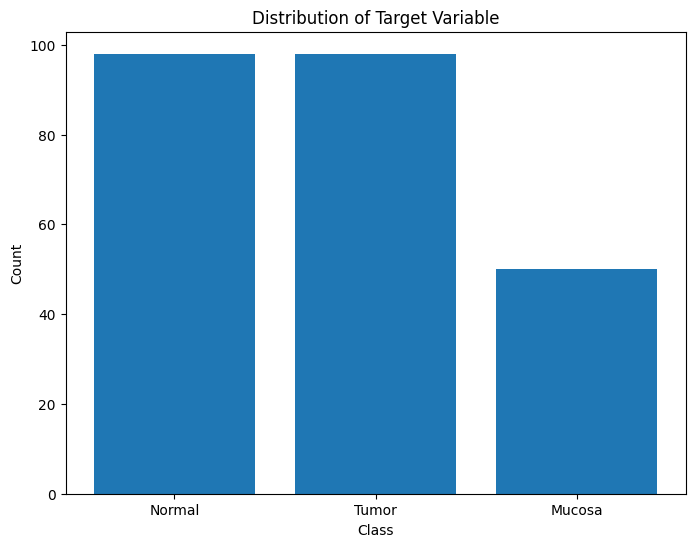

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert y_train to a pandas Series
y_train_series = pd.Series(y)

# Count class frequencies
class_counts = y_train_series.value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()

# Encode Lables

In [9]:
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y_encoded)

In [10]:
classes

array([0, 1, 2])

In [11]:
labels

array(['Mucosa', 'Normal', 'Tumor'], dtype=object)

In [12]:
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

# Data splilting into traning testing and validation sets

In [13]:
# Split data into train, validation, and test sets using stratified sampling
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=random_state)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.35, stratify=y_train, random_state=random_state)

In [14]:
X_train

,11728232_a_at,11735833_a_at,11719434_a_at,11728234_a_at,11739128_a_at,11732838_at,11715637_a_at,11721993_at,11733581_a_at,11750604_a_at,...,11746954_s_at,11760258_x_at,11718132_at,11720251_at,11724799_x_at,11746772_a_at,11757733_s_at,11757857_s_at,11756083_x_at,11715316_x_at
174,9.672009,8.625221,7.419478,8.600656,6.735733,3.710015,10.540584,7.022086,3.093853,6.313431,...,7.265476,7.045672,8.385668,7.888187,7.925390,7.970828,2.521944,2.089518,2.046241,2.528162
95,2.942906,3.741373,3.480641,2.399999,3.779013,9.620297,12.112314,5.078475,8.237969,4.700669,...,3.980457,8.156327,6.047096,8.435113,9.961592,8.410154,2.844264,2.558977,1.999897,3.320111
59,3.541279,3.313165,3.850774,3.284504,4.290396,10.103469,12.104464,5.100839,8.376795,4.456584,...,4.522457,7.693314,7.092459,3.758705,6.564474,5.065559,10.792557,9.581350,1.781050,10.230311
31,3.838821,3.256176,4.196985,2.749028,3.917272,9.878189,12.210135,4.567489,6.268109,4.383738,...,6.273684,7.127873,4.773361,3.377526,8.524720,7.334615,2.721225,2.274594,7.603785,2.666956
237,9.448681,10.030385,7.805858,8.285294,8.831930,2.741619,10.691396,9.073398,3.439281,7.333363,...,3.070312,8.144331,5.043410,2.848308,4.525425,9.646543,9.224781,8.431785,2.056623,2.027826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,9.148373,9.793907,7.470947,7.598862,8.175045,3.175931,10.170307,9.443516,2.213047,6.828235,...,5.885288,5.488615,6.071973,6.472945,8.278874,8.264365,2.695755,2.233281,2.144496,2.768024
159,8.159823,9.739355,7.506296,6.282101,8.678580,2.781816,10.446509,8.524104,2.970882,7.078129,...,4.015561,5.043604,4.805392,3.198002,5.340898,6.685070,2.329299,2.599321,4.870298,3.641333
236,8.014510,6.420904,6.758378,6.575747,6.584633,3.953184,10.708162,7.662507,3.288092,6.972868,...,4.624270,6.489714,5.760919,6.859966,5.338224,10.568323,2.381205,2.501097,7.807321,2.989362
4,4.173030,3.124475,4.084866,2.952316,4.199110,10.728334,12.545863,4.664203,7.205106,4.689223,...,6.359717,6.957954,5.230019,3.299203,8.718398,9.411712,9.604081,7.674544,7.982482,3.562634


In [15]:
y_train

array([2, 1, 1, 0, 2, 1, 1, 0, 2, 0, 1, 1, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       2, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 0, 2, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 0, 1,
       1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2,
       1, 0, 0, 2, 2, 1, 0, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 0, 0,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 0])

In [16]:
# Perform oversampling on the training data
smote = SMOTE(random_state = random_state)
X_train, y_train = smote.fit_resample(X_train, y_train)

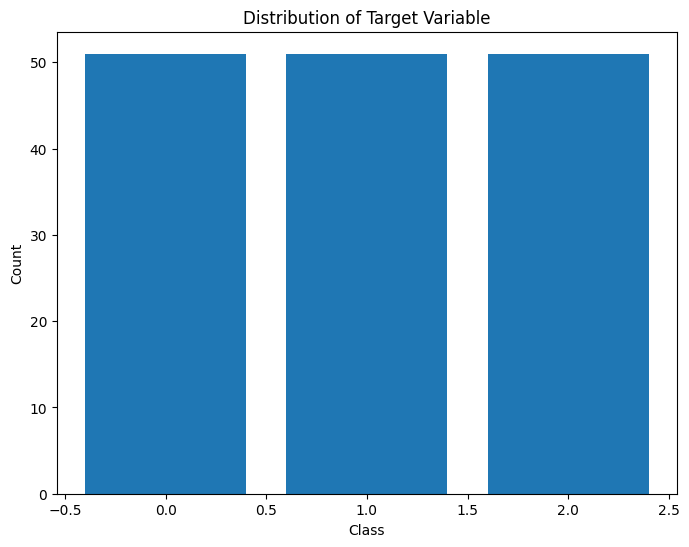

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert y_train to a pandas Series
y_train_series = pd.Series(y_train)

# Count class frequencies
class_counts = y_train_series.value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()

In [18]:
# Standardize the data using StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
X_val_norm = scaler.transform(X_val)

# Feature Selection Methods

In [19]:
# Repeated cross-validation for feature selection
n_features_to_select = 50
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
feature_importances = np.zeros(X_train_norm.shape[1])

for train_idx, test_idx in cv.split(X_train_norm, y_train):
    X_train_cv, X_test_cv = X_train_norm[train_idx], X_train_norm[test_idx]
    y_train_cv, y_test_cv = y_train[train_idx], y_train[test_idx]

    feature_selector = ReliefF()
    feature_selector.fit(X_train_cv, y_train_cv)
    selected_features = np.argsort(feature_selector.feature_importances_)[-n_features_to_select:]

    feature_importances[selected_features] += 1

# Normalize feature importance scores
feature_importances /= cv.n_splits

top_features_to_select = 50
# Get top k features based on importance scores
top_k_features = np.argsort(feature_importances)[-top_features_to_select:]
selected_features_names = X_train.columns[top_k_features]
print("Selected Features:", selected_features_names)

# Use selected features for model training/testing
X_train_selected = X_train_norm[:, top_k_features]
X_test_selected = X_test_norm[:, top_k_features]
X_val_selected = X_val_norm[:, top_k_features]

Selected Features: Index(['11723599_a_at', '11731981_a_at', '11727554_s_at', '11734459_x_at',
       '11736163_a_at', '11728998_x_at', '11750844_a_at', '11719434_a_at',
       '11755975_x_at', '11756338_x_at', '11742938_at', '11758028_s_at',
       '11717822_a_at', '11717820_a_at', '11722059_at', '11736852_at',
       '11721993_at', '11728575_a_at', '11733581_a_at', '11759464_at',
       '11732699_a_at', '11737294_a_at', '11733744_at', '11724538_a_at',
       '11721557_a_at', '11742188_a_at', '11746142_a_at', '11729582_s_at',
       '11729583_x_at', '11730091_at', '11715104_s_at', '11723826_a_at',
       '11734322_at', '11728771_a_at', '11734320_a_at', '11734319_a_at',
       '11727553_a_at', '11731120_at', '11754709_x_at', '11754909_a_at',
       '11722783_at', '11730765_at', '11740060_at', '11735833_a_at',
       '11732700_x_at', '11730973_a_at', '11728234_a_at', '11732838_at',
       '11726764_at', '11728232_a_at'],
      dtype='object')


In [20]:
df = pd.read_csv('colorectal_annot.csv')

In [21]:
# Read the file into a DataFrame
df = pd.read_csv('colorectal_annot.csv')

# Create a list of selected features
selected_features = selected_features_names.tolist()

# Create a DataFrame from selected_features with an index
selected_df = pd.DataFrame({'ID': selected_features}).reset_index()

# Merge this DataFrame with the original df
selected_features_df = selected_df.merge(df, on='ID', how='left')

# Sort by the original index to preserve order
selected_features_df = selected_features_df.sort_values('index').drop('index', axis=1).reset_index(drop=True)

# Print the selected features and their gene symbols
print(selected_features_df)

               ID Gene.Symbol
0   11723599_a_at      PHLPP2
1   11731981_a_at    C6orf105
2   11727554_s_at        PKIB
3   11734459_x_at        EDN3
4   11736163_a_at      CDKN2B
5   11728998_x_at       GCNT2
6   11750844_a_at     SLC17A4
7   11719434_a_at        ETV4
8   11755975_x_at        PKIB
9   11756338_x_at      DHRS11
10    11742938_at       ASCL2
11  11758028_s_at       FOXQ1
12  11717822_a_at      SLC4A4
13  11717820_a_at      SLC4A4
14    11722059_at        ZG16
15    11736852_at      LRRC19
16    11721993_at      SLC6A6
17  11728575_a_at       CWH43
18  11733581_a_at         CA7
19    11759464_at       OTOP2
20  11732699_a_at        PKIB
21  11737294_a_at      TMIGD1
22    11733744_at      MS4A12
23  11724538_a_at       ABCG2
24  11721557_a_at       ABCA8
25  11742188_a_at      SLC4A4
26  11746142_a_at      ZNF611
27  11729582_s_at         CA1
28  11729583_x_at         CA1
29    11730091_at       BEST4
30  11715104_s_at       OTOP2
31  11723826_a_at     C2orf88
32    1173

In [22]:
# Group the DataFrame by the 'Gene.Symbol' column
grouped = selected_features_df.groupby('Gene.Symbol')

# Drop duplicates within each group, keeping the first occurrence
deduped = grouped.apply(lambda x: x.drop_duplicates(subset='Gene.Symbol', keep='first'))

# Reset the index to remove the MultiIndex
deduped = deduped.reset_index(drop=True)

# Print the deduplicated DataFrame
print(deduped)

               ID Gene.Symbol
0   11721557_a_at       ABCA8
1   11724538_a_at       ABCG2
2     11726764_at        AQP8
3     11742938_at       ASCL2
4     11730091_at       BEST4
5     11734322_at        BMP3
6   11723826_a_at     C2orf88
7   11731981_a_at    C6orf105
8   11729582_s_at         CA1
9   11730973_a_at         CA4
10  11733581_a_at         CA7
11    11730765_at       CD177
12  11736163_a_at      CDKN2B
13  11728771_a_at       CLCA4
14  11728234_a_at       CLDN1
15  11728575_a_at       CWH43
16  11756338_x_at      DHRS11
17  11734459_x_at        EDN3
18  11719434_a_at        ETV4
19    11740060_at       FABP2
20  11758028_s_at       FOXQ1
21  11728998_x_at       GCNT2
22    11732838_at      GUCA2B
23  11735833_a_at    KIAA1199
24    11736852_at      LRRC19
25    11733744_at      MS4A12
26    11759464_at       OTOP2
27    11731120_at       PDE6A
28  11723599_a_at      PHLPP2
29  11727554_s_at        PKIB
30  11750844_a_at     SLC17A4
31  11754709_x_at    SLC25A34
32  117178

C:\Users\photo\AppData\Local\Temp\ipykernel_15796\559448306.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  deduped = grouped.apply(lambda x: x.drop_duplicates(subset='Gene.Symbol', keep='first'))


In [23]:
# Specify the file path where you want to save the Excel file
excel_file_path = '35.csv'

# Save the deduplicated DataFrame to Excel
deduped.to_csv(excel_file_path, index=False)

print(f"Deduplicated data has been saved to '{excel_file_path}'")

Deduplicated data has been saved to '35.csv'


In [24]:
# Gene.Symbol is the column containing gene symbols
gene_symbols = selected_features_df['Gene.Symbol'].tolist()

# Print the gene symbols
print(gene_symbols)


['PHLPP2', 'C6orf105', 'PKIB', 'EDN3', 'CDKN2B', 'GCNT2', 'SLC17A4', 'ETV4', 'PKIB', 'DHRS11', 'ASCL2', 'FOXQ1', 'SLC4A4', 'SLC4A4', 'ZG16', 'LRRC19', 'SLC6A6', 'CWH43', 'CA7', 'OTOP2', 'PKIB', 'TMIGD1', 'MS4A12', 'ABCG2', 'ABCA8', 'SLC4A4', 'ZNF611', 'CA1', 'CA1', 'BEST4', 'OTOP2', 'C2orf88', 'BMP3', 'CLCA4', 'SLC17A4', 'SLC17A4', 'PKIB', 'PDE6A', 'SLC25A34', 'C2orf88', 'FOXQ1', 'CD177', 'FABP2', 'KIAA1199', 'PKIB', 'CA4', 'CLDN1', 'GUCA2B', 'AQP8', 'CLDN1']


# Model Traning

# Random Forest

In [25]:
# Train the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=random_state)
cv_scores_rf = cross_val_score(rf_clf,X_train_selected, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
print("Random Forest Mean cross-validation accuracy: {:.2f}".format(np.mean(cv_scores_rf)))
rf_clf.fit(X_train_selected, y_train)

Random Forest Mean cross-validation accuracy: 0.95


RandomForestClassifier(random_state=42)

Accuracy: 0.9600
Balanced Accuracy: 0.9667
F1-score: 0.9589
Precision: 0.9530
Recall: 0.9667

Classification Report:
               precision    recall  f1-score   support

      Mucosa       0.91      1.00      0.95        10
      Normal       0.95      0.95      0.95        20
       Tumor       1.00      0.95      0.97        20

    accuracy                           0.96        50
   macro avg       0.95      0.97      0.96        50
weighted avg       0.96      0.96      0.96        50



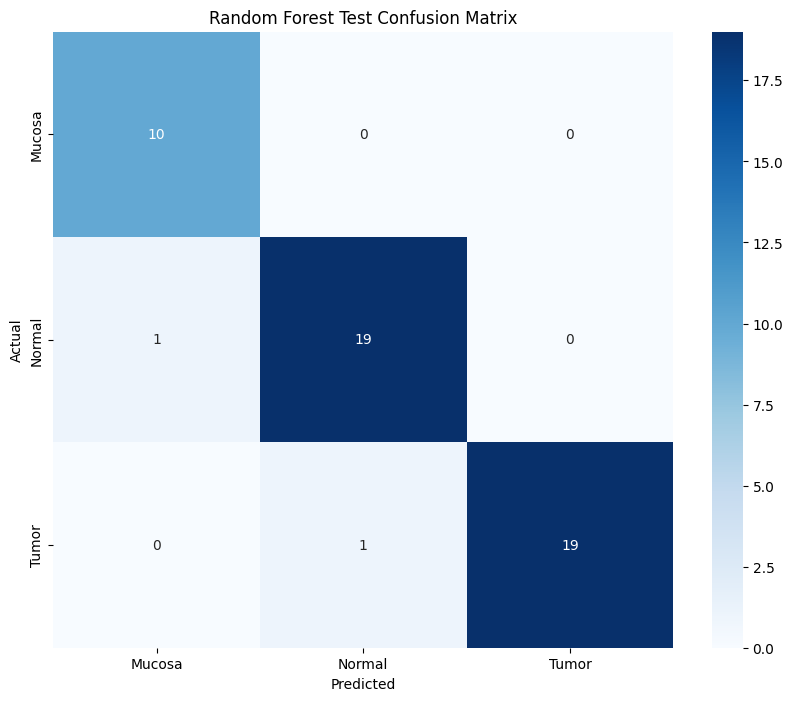

In [26]:
# Evaluate the model performance on the test set
y_pred = rf_clf.predict(X_test_selected)

accuracy_rf = accuracy_score(y_test, y_pred)
balanced_accuracy_rf = balanced_accuracy_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred, average='macro')
precision_rf = precision_score(y_test, y_pred, average='macro')
recall_rf = recall_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy_rf:.4f}')
print(f'Balanced Accuracy: {balanced_accuracy_rf:.4f}')
print(f'F1-score: {f1_rf:.4f}')
print(f'Precision: {precision_rf:.4f}')
print(f'Recall: {recall_rf:.4f}')

# Print the classification report
report = classification_report(y_test, y_pred, target_names=labels)
print('\nClassification Report:\n', report)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Random Forest Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('subset3/RF Test Confusion Matrix', dpi=300, bbox_inches='tight')
plt.show()

In [27]:
# Evaluate the model performance on the validation set
y_pred_val_rf = rf_clf.predict(X_val_selected)

accuracy_val_rf = accuracy_score(y_val, y_pred_val_rf)
balanced_accuracy_val_rf = balanced_accuracy_score(y_val, y_pred_val_rf)
f1_val_rf = f1_score(y_val, y_pred_val_rf, average='macro')
precision_val_rf = precision_score(y_val, y_pred_val_rf, average='macro')
recall_val_rf = recall_score(y_val, y_pred_val_rf, average='macro')

print("\nRandom Forest Validation Metrics:")
print(f'Accuracy: {accuracy_val_rf:.7f}')
print(f'Balanced Accuracy: {balanced_accuracy_val_rf:.7f}')
print(f'F1-score: {f1_val_rf:.7f}')
print(f'Precision: {precision_val_rf:.7f}')
print(f'Recall: {recall_val_rf:.7f}')


Random Forest Validation Metrics:
Accuracy: 0.9710145
Balanced Accuracy: 0.9642857
F1-score: 0.9696890
Precision: 0.9761905
Recall: 0.9642857


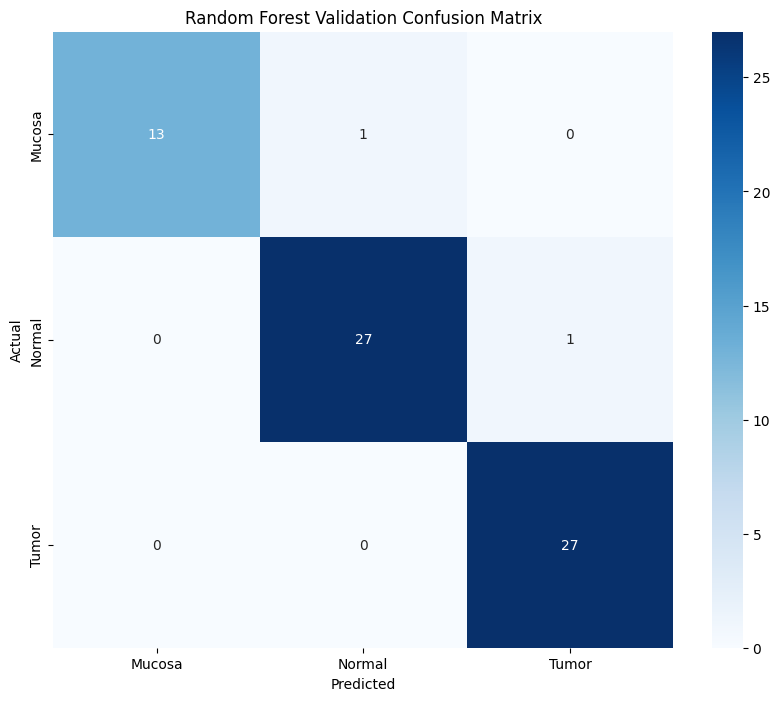

In [28]:
# Plot the confusion matrix
cm_test_rf = confusion_matrix(y_val, y_pred_val_rf)
cm_df_test_rf = pd.DataFrame(cm_test_rf, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df_test_rf, annot=True, cmap='Blues', fmt='g')
plt.title('Random Forest Validation Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('subset3/RF Validation Confusion Matrix', dpi=300, bbox_inches='tight')
plt.show()

In [29]:
# import numpy as np
# from sklearn.ensemble import RandomForestClassifier

# Define the number of times to perform feature selection
n_iterations = 10000

# Initialize an array to store feature importances
feature_importances = np.zeros(X_train_selected.shape[1])

for i in range(n_iterations):
    rf_clf = rf_clf
    rf_clf.fit(X_train_selected, y_train)
    feature_importances += rf_clf.feature_importances_ 
# Normalize feature importances
feature_importances /= n_iterations

# Extract gene symbols from the selected features dataframe
gene_symbols = selected_features_df['Gene.Symbol'].tolist()

feature_importance_tuples = list(zip(gene_symbols, feature_importances))

# Sort the tuples by importance in descending order
feature_importance_tuples = sorted(feature_importance_tuples, key=lambda x: x[1], reverse=True)

# Create a DataFrame to store feature names and importance scores
feature_importance_df = pd.DataFrame(feature_importance_tuples, columns=['Feature', 'Importance'])

# Print the top k features
top_k = 20
print(f"Top {top_k} important features:")
print(feature_importance_df.head(top_k))

Top 20 important features:
     Feature  Importance
0     SLC6A6    0.054178
1       AQP8    0.052819
2      OTOP2    0.046477
3      GCNT2    0.043240
4   KIAA1199    0.040534
5       PKIB    0.039400
6    SLC17A4    0.031401
7     LRRC19    0.030873
8      ABCA8    0.029749
9     DHRS11    0.029713
10      PKIB    0.028936
11    SLC4A4    0.027341
12      BMP3    0.027145
13       CA7    0.026399
14   C2orf88    0.025989
15      PKIB    0.024485
16      EDN3    0.023614
17    CDKN2B    0.022518
18      PKIB    0.022169
19     CWH43    0.020782


In [30]:
top_features = feature_importance_df.head(top_k)

In [31]:
# Specify the file path where you want to save the Excel file
excel_file_path = 'RF_35_top_20.csv'

# Save the deduplicated DataFrame to Excel
top_features.to_csv(excel_file_path, index=False)

print(f"Deduplicated data has been saved to '{excel_file_path}'")

Deduplicated data has been saved to 'RF_35_top_20.csv'


# Support Vector Machine

In [32]:
# Train the SVM classifier with the selected features
svm_clf = SVC(random_state=random_state)
cv_scores_svm = cross_val_score(svm_clf,X_train_selected, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
print("SVM Mean cross-validation accuracy: {:.2f}".format(np.mean(cv_scores_svm)))
svm_clf.fit(X_train_selected,y_train)


SVM Mean cross-validation accuracy: 0.91


SVC(random_state=42)

Accuracy: 0.90
Balanced Accuracy: 0.92
F1-score: 0.89
Precision: 0.89
Recall: 0.92

Classification Report:
               precision    recall  f1-score   support

      Mucosa       0.71      1.00      0.83        10
      Normal       0.94      0.80      0.86        20
       Tumor       1.00      0.95      0.97        20

    accuracy                           0.90        50
   macro avg       0.89      0.92      0.89        50
weighted avg       0.92      0.90      0.90        50



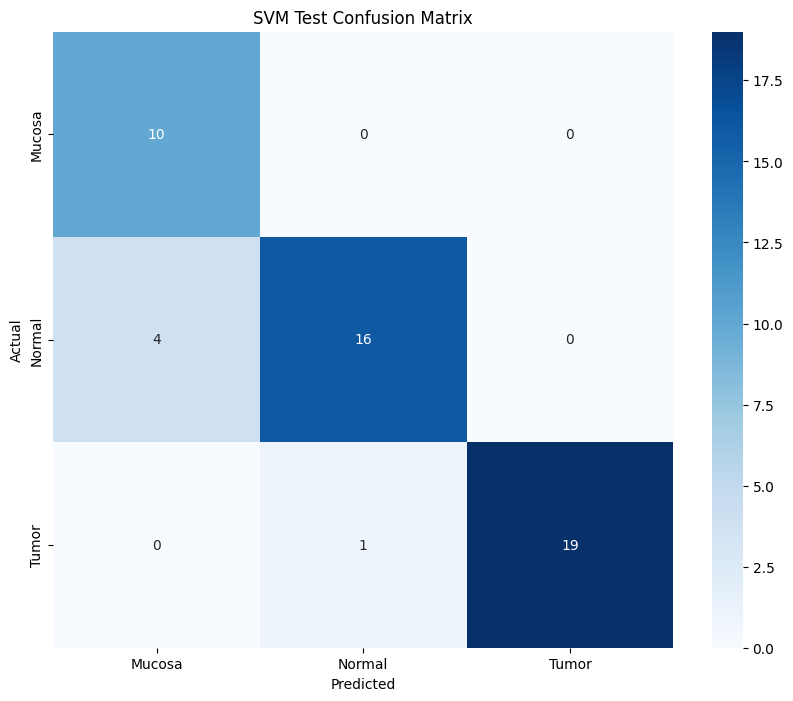

In [33]:
# Evaluate the model performance on the test set
y_pred = svm_clf.predict(X_test_selected)

accuracy_svm = accuracy_score(y_test, y_pred)
balanced_accuracy_svm = balanced_accuracy_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred, average='macro')
precision_svm = precision_score(y_test, y_pred, average='macro')
recall_svm = recall_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy_svm:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy_svm:.2f}')
print(f'F1-score: {f1_svm:.2f}')
print(f'Precision: {precision_svm:.2f}')
print(f'Recall: {recall_svm:.2f}')

# Print the classification report
report = classification_report(y_test, y_pred, target_names=labels)
print('\nClassification Report:\n', report)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('SVM Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('subset3/SVM Test Confusion Matrix', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
y_pred_val_svm = svm_clf.predict(X_val_selected)
accuracy_val_svm = accuracy_score(y_val, y_pred_val_svm)
balanced_accuracy_val_svm = balanced_accuracy_score(y_val, y_pred_val_svm)
f1_val_svm = f1_score(y_val, y_pred_val_svm, average='macro')
precision_val_svm = precision_score(y_val, y_pred_val_svm, average='macro')
recall_val_svm = recall_score(y_val, y_pred_val_svm, average='macro')
print("\nSVM Validation Metrics:")
print(f'Accuracy: {accuracy_val_svm:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy_val_svm:.2f}')
print(f'F1-score: {f1_val_svm:.2f}')
print(f'Precision: {precision_val_svm:.2f}')
print(f'Recall: {recall_val_svm:.2f}')


SVM Validation Metrics:
Accuracy: 0.96
Balanced Accuracy: 0.95
F1-score: 0.95
Precision: 0.95
Recall: 0.95


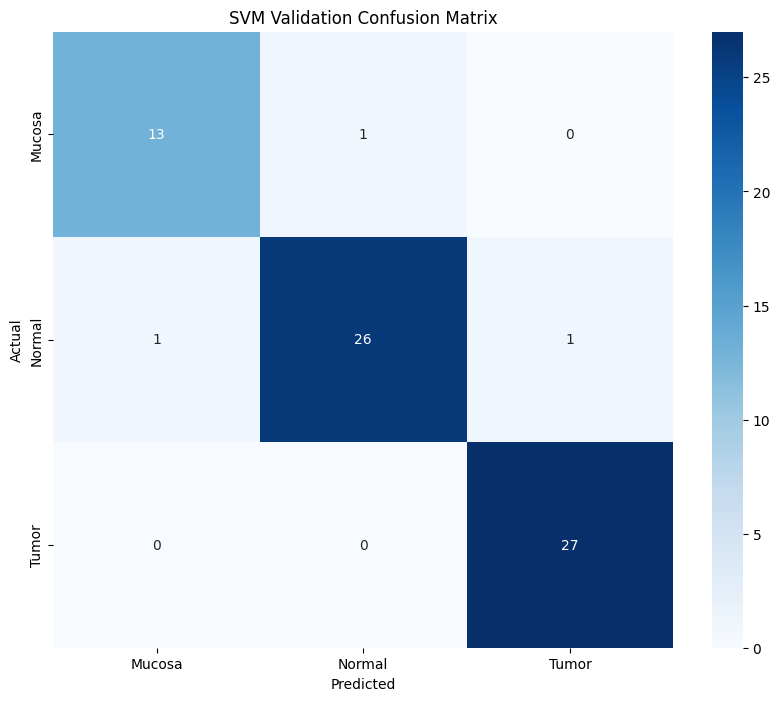

In [35]:
# Plot the confusion matrix for validation set
cm_val_svm = confusion_matrix(y_val, y_pred_val_svm)
cm_df_val_svm = pd.DataFrame(cm_val_svm, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df_val_svm, annot=True, cmap='Blues', fmt='g')
plt.title('SVM Validation Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('subset3/SVM Validation Confusion Matrix', dpi=300, bbox_inches='tight')
plt.show()

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
lr_clf = LogisticRegression(random_state=random_state)
cv_scores_lr = cross_val_score(lr_clf,X_train_selected, y_train, cv=5, scoring='accuracy')
print("Logistic Regression Mean cross-validation accuracy: {:.2f}".format(np.mean(cv_scores_lr)))
lr_clf.fit(X_train_selected, y_train)

Logistic Regression Mean cross-validation accuracy: 0.95


LogisticRegression(random_state=42)

Accuracy: 0.92
Balanced Accuracy: 0.92
F1-score: 0.91
Precision: 0.91
Recall: 0.92

Classification Report:
               precision    recall  f1-score   support

      Mucosa       0.82      0.90      0.86        10
      Normal       0.90      0.90      0.90        20
       Tumor       1.00      0.95      0.97        20

    accuracy                           0.92        50
   macro avg       0.91      0.92      0.91        50
weighted avg       0.92      0.92      0.92        50



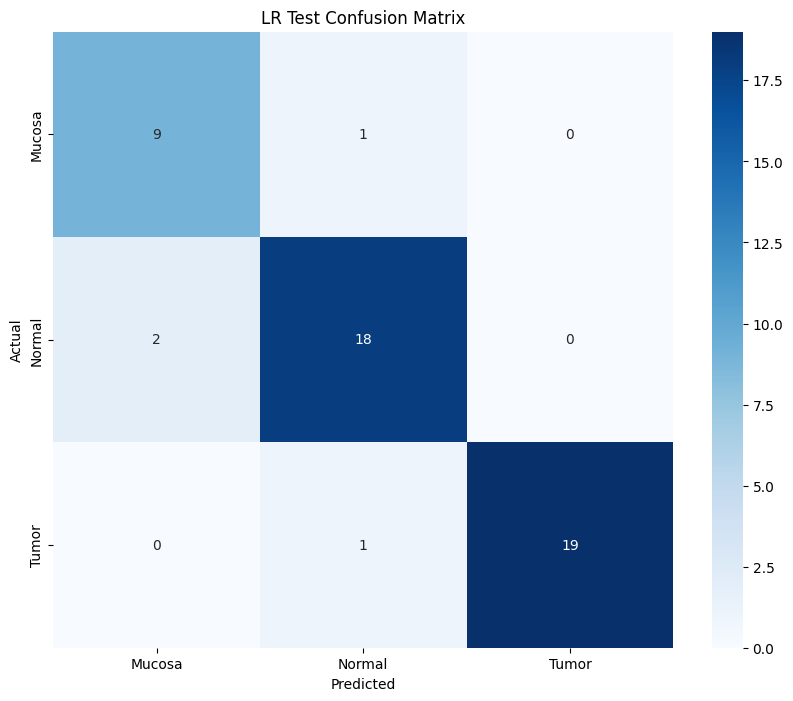

In [37]:
# Evaluate the model performance on the test set
y_pred_lr = lr_clf.predict(X_test_selected)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
balanced_accuracy_lr = balanced_accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='macro')
precision_lr = precision_score(y_test, y_pred_lr, average='macro')
recall_lr = recall_score(y_test, y_pred_lr, average='macro')

print(f'Accuracy: {accuracy_lr:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy_lr:.2f}')
print(f'F1-score: {f1_lr:.2f}')
print(f'Precision: {precision_lr:.2f}')
print(f'Recall: {recall_lr:.2f}')

# Print the classification report
report = classification_report(y_test, y_pred_lr, target_names=labels)
print('\nClassification Report:\n', report)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('LR Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('subset3/LR Test Confusion Matrix', dpi=300, bbox_inches='tight')
plt.show()

LR Validation Metrics:
Accuracy: 0.99
Balanced Accuracy: 0.98
F1-score: 0.98
Precision: 0.99
Recall: 0.98


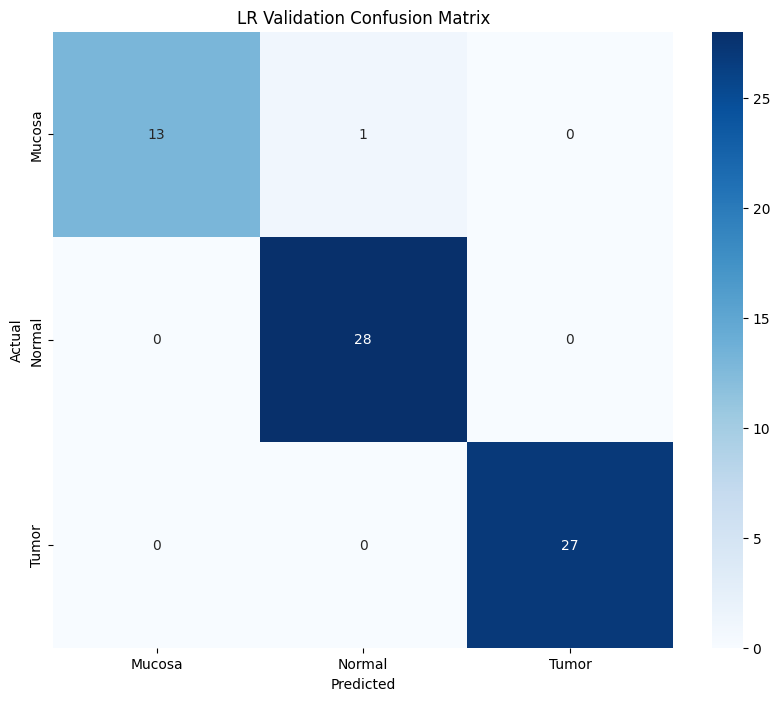

In [38]:
y_pred_val_lr = lr_clf.predict(X_val_selected)
accuracy_val_lr = accuracy_score(y_val, y_pred_val_lr)
balanced_accuracy_val_lr = balanced_accuracy_score(y_val, y_pred_val_lr)
f1_val_lr = f1_score(y_val, y_pred_val_lr, average='macro')
precision_val_lr = precision_score(y_val, y_pred_val_lr, average='macro')
recall_val_lr = recall_score(y_val, y_pred_val_lr, average='macro')
print("LR Validation Metrics:")
print(f'Accuracy: {accuracy_val_lr:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy_val_lr:.2f}')
print(f'F1-score: {f1_val_lr:.2f}')
print(f'Precision: {precision_val_lr:.2f}')
print(f'Recall: {recall_val_lr:.2f}')
# Plot the confusion matrix for validation set
cm_val_lr = confusion_matrix(y_val, y_pred_val_lr)
cm_df_val_lr = pd.DataFrame(cm_val_lr, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df_val_lr, annot=True, cmap='Blues', fmt='g')
plt.title('LR Validation Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('subset3/LR Validation Confusion Matrix', dpi=300, bbox_inches='tight')
plt.show()

# KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN
knn_clf = KNeighborsClassifier()
cv_scores_knn = cross_val_score(knn_clf,X_train_selected, y_train, cv=5, scoring='accuracy')
print("KNN Mean cross-validation accuracy: {:.2f}".format(np.mean(cv_scores_knn)))
knn_clf.fit(X_train_selected, y_train)

KNN Mean cross-validation accuracy: 0.92


KNeighborsClassifier()

Accuracy: 0.96
Balanced Accuracy: 0.97
F1-score: 0.96
Precision: 0.95
Recall: 0.97

Classification Report:
               precision    recall  f1-score   support

      Mucosa       0.91      1.00      0.95        10
      Normal       0.95      0.95      0.95        20
       Tumor       1.00      0.95      0.97        20

    accuracy                           0.96        50
   macro avg       0.95      0.97      0.96        50
weighted avg       0.96      0.96      0.96        50



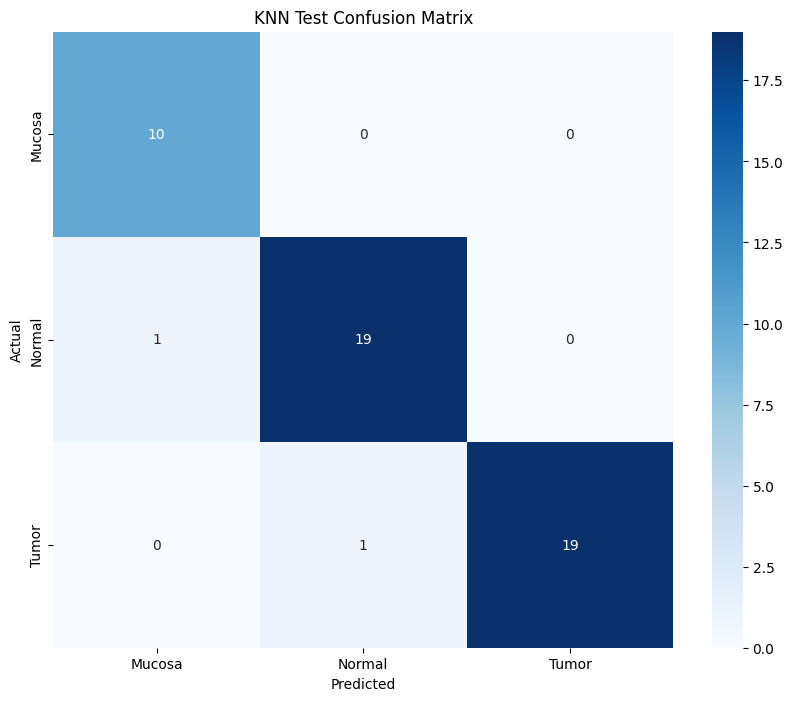

In [40]:
# Evaluate the model performance on the test set
y_pred_knn = knn_clf.predict(X_test_selected)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
balanced_accuracy_knn = balanced_accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='macro')
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')

print(f'Accuracy: {accuracy_knn:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy_knn:.2f}')
print(f'F1-score: {f1_knn:.2f}')
print(f'Precision: {precision_knn:.2f}')
print(f'Recall: {recall_knn:.2f}')

# Print the classification report
report = classification_report(y_test, y_pred_knn, target_names=labels)
print('\nClassification Report:\n', report)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('KNN Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('subset3/KNN Test Confusion Matrix', dpi=300, bbox_inches='tight')
plt.show()


KNN Validation Metrics:
Accuracy: 0.94
Balanced Accuracy: 0.94
F1-score: 0.93
Precision: 0.93
Recall: 0.94


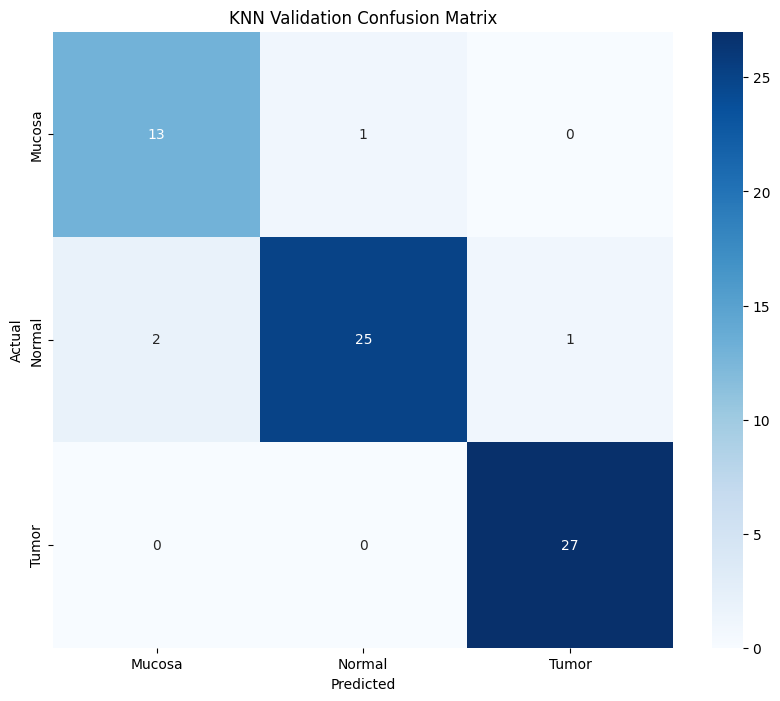

In [41]:
y_pred_val_knn = knn_clf.predict(X_val_selected)
accuracy_val_knn = accuracy_score(y_val, y_pred_val_knn)
balanced_accuracy_val_knn = balanced_accuracy_score(y_val, y_pred_val_knn)
f1_val_knn = f1_score(y_val, y_pred_val_knn, average='macro')
precision_val_knn = precision_score(y_val, y_pred_val_knn, average='macro')
recall_val_knn = recall_score(y_val, y_pred_val_knn, average='macro')
print("\nKNN Validation Metrics:")
print(f'Accuracy: {accuracy_val_knn:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy_val_knn:.2f}')
print(f'F1-score: {f1_val_knn:.2f}')
print(f'Precision: {precision_val_knn:.2f}')
print(f'Recall: {recall_val_knn:.2f}')
# Plot the confusion matrix for validation set
cm_val_knn = confusion_matrix(y_val, y_pred_val_knn)
cm_df_val_knn = pd.DataFrame(cm_val_knn, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df_val_knn, annot=True, cmap='Blues', fmt='g')
plt.title('KNN Validation Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('subset3/KNN Validation Confusion Matrix', dpi=300, bbox_inches='tight')
plt.show()

# XGBoost

In [42]:
# Train XGBoost
xgb_clf = XGBClassifier(random_state=random_state)
cv_scores_xgb = cross_val_score(xgb_clf,X_train_selected, y_train, cv=5, scoring='accuracy')
print("XGBoost Mean cross-validation accuracy: {:.2f}".format(np.mean(cv_scores_xgb)))
xgb_clf.fit(X_train_selected, y_train)

XGBoost Mean cross-validation accuracy: 0.93


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Accuracy: 0.94
Balanced Accuracy: 0.93
F1-score: 0.93
Precision: 0.92
Recall: 0.93

Classification Report:
               precision    recall  f1-score   support

      Mucosa       0.82      0.90      0.86        10
      Normal       0.95      0.90      0.92        20
       Tumor       1.00      1.00      1.00        20

    accuracy                           0.94        50
   macro avg       0.92      0.93      0.93        50
weighted avg       0.94      0.94      0.94        50



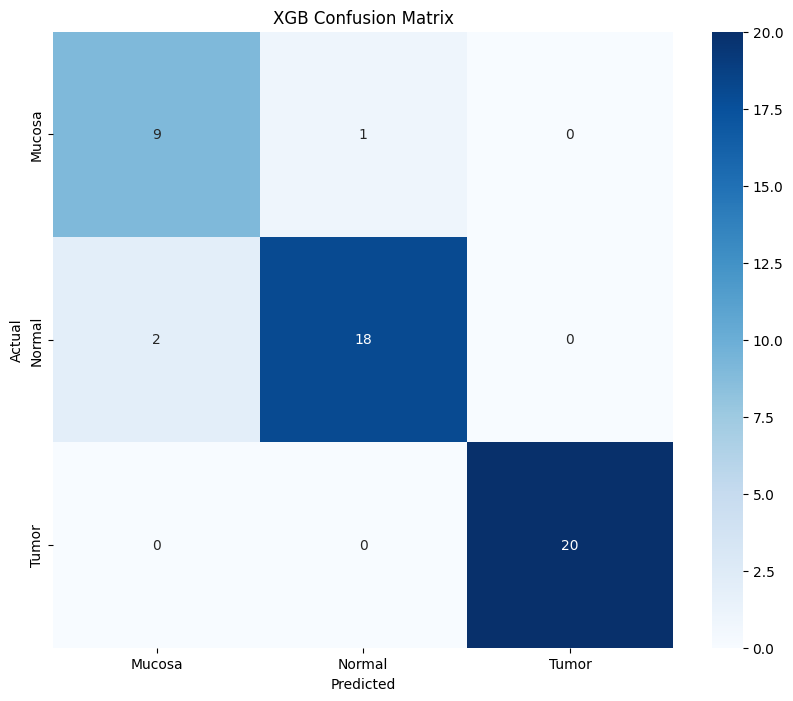

In [43]:
# Evaluate the model performance on the test set
y_pred_xgb = xgb_clf.predict(X_test_selected)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
balanced_accuracy_xgb = balanced_accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')
precision_xgb = precision_score(y_test, y_pred_xgb, average='macro')
recall_xgb = recall_score(y_test, y_pred_xgb, average='macro')

print(f'Accuracy: {accuracy_xgb:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy_xgb:.2f}')
print(f'F1-score: {f1_xgb:.2f}')
print(f'Precision: {precision_xgb:.2f}')
print(f'Recall: {recall_xgb:.2f}')

# Print the classification report
report = classification_report(y_test, y_pred_xgb, target_names=labels)
print('\nClassification Report:\n', report)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('XGB Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('subset3/XGB Test Confusion Matrix', dpi=300, bbox_inches='tight')
plt.show()


XGB Validation Metrics:
Accuracy: 0.97
Balanced Accuracy: 0.96
F1-score: 0.96
Precision: 0.96
Recall: 0.96


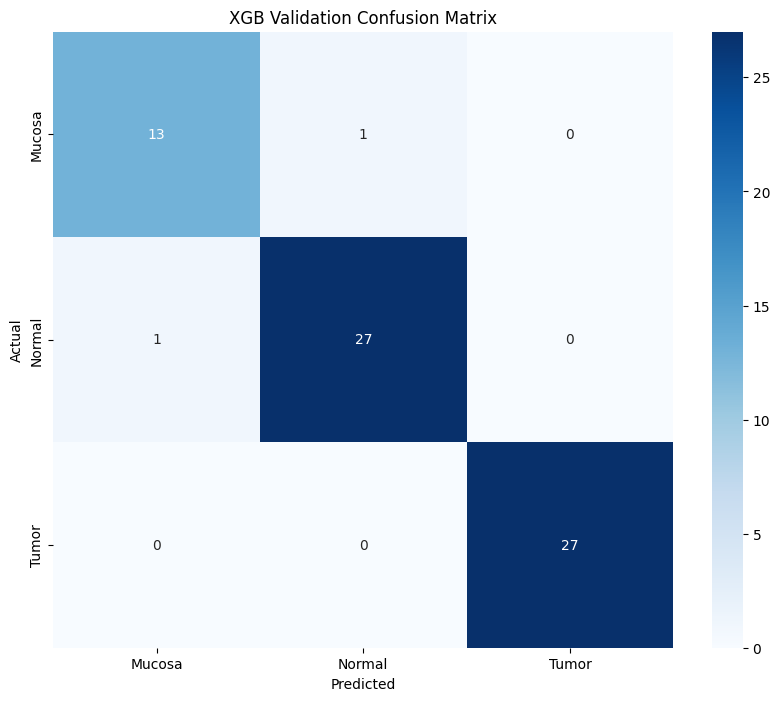

In [44]:
y_pred_val_xgb = xgb_clf.predict(X_val_selected)
accuracy_val_xgb = accuracy_score(y_val, y_pred_val_xgb)
balanced_accuracy_val_xgb = balanced_accuracy_score(y_val, y_pred_val_xgb)
f1_val_xgb = f1_score(y_val, y_pred_val_xgb, average='macro')
precision_val_xgb = precision_score(y_val, y_pred_val_xgb, average='macro')
recall_val_xgb = recall_score(y_val, y_pred_val_xgb, average='macro')
print("\nXGB Validation Metrics:")
print(f'Accuracy: {accuracy_val_xgb:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy_val_xgb:.2f}')
print(f'F1-score: {f1_val_xgb:.2f}')
print(f'Precision: {precision_val_xgb:.2f}')
print(f'Recall: {recall_val_xgb:.2f}')
# Plot the confusion matrix for validation set
cm_val_xgb = confusion_matrix(y_val, y_pred_val_xgb)
cm_df_val_xgb = pd.DataFrame(cm_val_xgb, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df_val_xgb, annot=True, cmap='Blues', fmt='g')
plt.title('XGB Validation Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('subset3/XGB Validation Confusion Matrix', dpi=300, bbox_inches='tight')
plt.show()

#  Multi-Layer Perceptron (MLP)

In [45]:
from sklearn.neural_network import MLPClassifier

# Train MLP
mlp_clf = MLPClassifier(random_state=random_state, max_iter=1000)
cv_scores_mlp = cross_val_score(mlp_clf,X_train_selected, y_train, cv=5, scoring='accuracy')
print("MLP Mean cross-validation accuracy: {:.2f}".format(np.mean(cv_scores_mlp)))
mlp_clf.fit(X_train_selected, y_train)

MLP Mean cross-validation accuracy: 0.96


MLPClassifier(max_iter=1000, random_state=42)

Accuracy: 0.92
Balanced Accuracy: 0.92
F1-score: 0.91
Precision: 0.91
Recall: 0.92

Classification Report:
               precision    recall  f1-score   support

      Mucosa       0.82      0.90      0.86        10
      Normal       0.90      0.90      0.90        20
       Tumor       1.00      0.95      0.97        20

    accuracy                           0.92        50
   macro avg       0.91      0.92      0.91        50
weighted avg       0.92      0.92      0.92        50



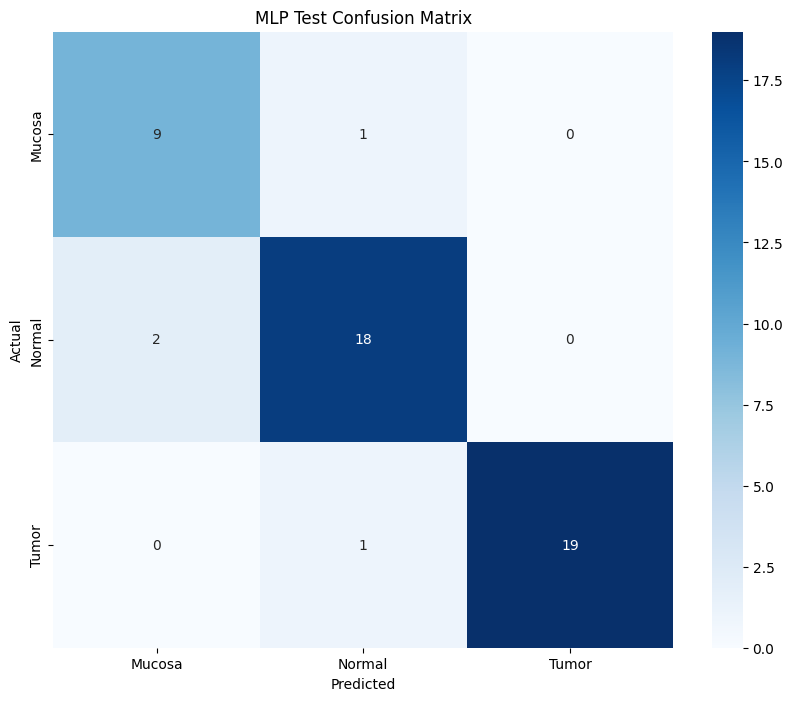

In [46]:
# Evaluate the model performance on the test set
y_pred_mlp = mlp_clf.predict(X_test_selected)

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
balanced_accuracy_mlp = balanced_accuracy_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp, average='macro')
precision_mlp = precision_score(y_test, y_pred_mlp, average='macro')
recall_mlp = recall_score(y_test, y_pred_mlp, average='macro')

print(f'Accuracy: {accuracy_mlp:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy_mlp:.2f}')
print(f'F1-score: {f1_mlp:.2f}')
print(f'Precision: {precision_mlp:.2f}')
print(f'Recall: {recall_mlp:.2f}')

# Print the classification report
report = classification_report(y_test, y_pred_mlp, target_names=labels)
print('\nClassification Report:\n', report)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_mlp)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('MLP Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('subset3/MLP Test Confusion Matrix', dpi=300, bbox_inches='tight')
plt.show()


MLP Validation Metrics:
Accuracy: 0.97
Balanced Accuracy: 0.96
F1-score: 0.97
Precision: 0.98
Recall: 0.96


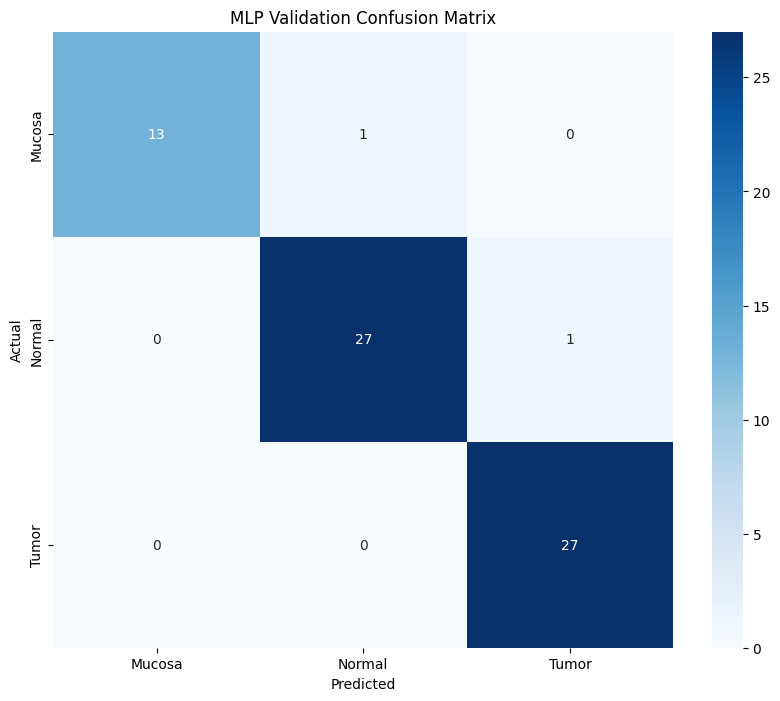

In [47]:
y_pred_val_mlp = mlp_clf.predict(X_val_selected)
accuracy_val_mlp = accuracy_score(y_val, y_pred_val_mlp)
balanced_accuracy_val_mlp = balanced_accuracy_score(y_val, y_pred_val_mlp)
f1_val_mlp = f1_score(y_val, y_pred_val_mlp, average='macro')
precision_val_mlp = precision_score(y_val, y_pred_val_mlp, average='macro')
recall_val_mlp = recall_score(y_val, y_pred_val_mlp, average='macro')
print("\nMLP Validation Metrics:")
print(f'Accuracy: {accuracy_val_mlp:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy_val_mlp:.2f}')
print(f'F1-score: {f1_val_mlp:.2f}')
print(f'Precision: {precision_val_mlp:.2f}')
print(f'Recall: {recall_val_mlp:.2f}')
# Plot the confusion matrix for validation set
cm_val_mlp = confusion_matrix(y_val, y_pred_val_mlp)
cm_df_val_mlp = pd.DataFrame(cm_val_mlp, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df_val_mlp, annot=True, cmap='Blues', fmt='g')
plt.title('MLP Validation Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('subset3/MLP Validation Confusion Matrix', dpi=300, bbox_inches='tight')
plt.show()

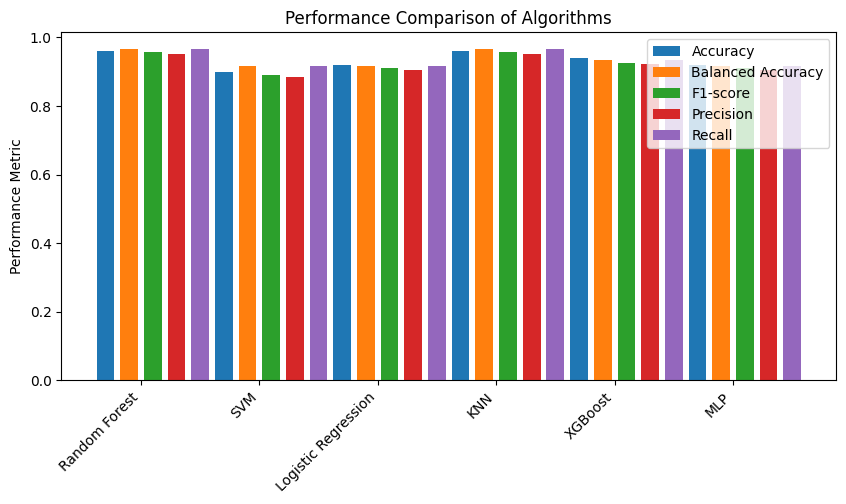

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their corresponding performance metrics
models = ['Random Forest', 'SVM', 'Logistic Regression', 'KNN', 'XGBoost', 'MLP']
accuracy = [accuracy_rf, accuracy_svm, accuracy_lr, accuracy_knn, accuracy_xgb, accuracy_mlp]
balanced_accuracy = [balanced_accuracy_rf, balanced_accuracy_svm, balanced_accuracy_lr, balanced_accuracy_knn, balanced_accuracy_xgb, balanced_accuracy_mlp]
f1_score = [f1_rf, f1_svm, f1_lr, f1_knn, f1_xgb, f1_mlp]
precision = [precision_rf, precision_svm, precision_lr, precision_knn, precision_xgb, precision_mlp]
recall = [recall_rf, recall_svm, recall_lr, recall_knn, recall_xgb, recall_mlp]

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Set the x-axis tick locations and labels
x = np.arange(len(models))
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')

# Create a bar plot for each performance metric
bar_width = 0.15
bar1 = ax.bar(x - 0.3, accuracy, bar_width, label='Accuracy')
bar2 = ax.bar(x - 0.1, balanced_accuracy, bar_width, label='Balanced Accuracy')
bar3 = ax.bar(x + 0.1, f1_score, bar_width, label='F1-score')
bar4 = ax.bar(x + 0.3, precision, bar_width, label='Precision')
bar5 = ax.bar(x + 0.5, recall, bar_width, label='Recall')

# Add labels and legend
ax.set_ylabel('Performance Metric')
ax.set_title('Performance Comparison of Algorithms')
ax.legend()

# Adjust the spacing between subplots
plt.subplots_adjust(bottom=0.3)

# Display the plot
plt.show()

# PCA Plot of the Data

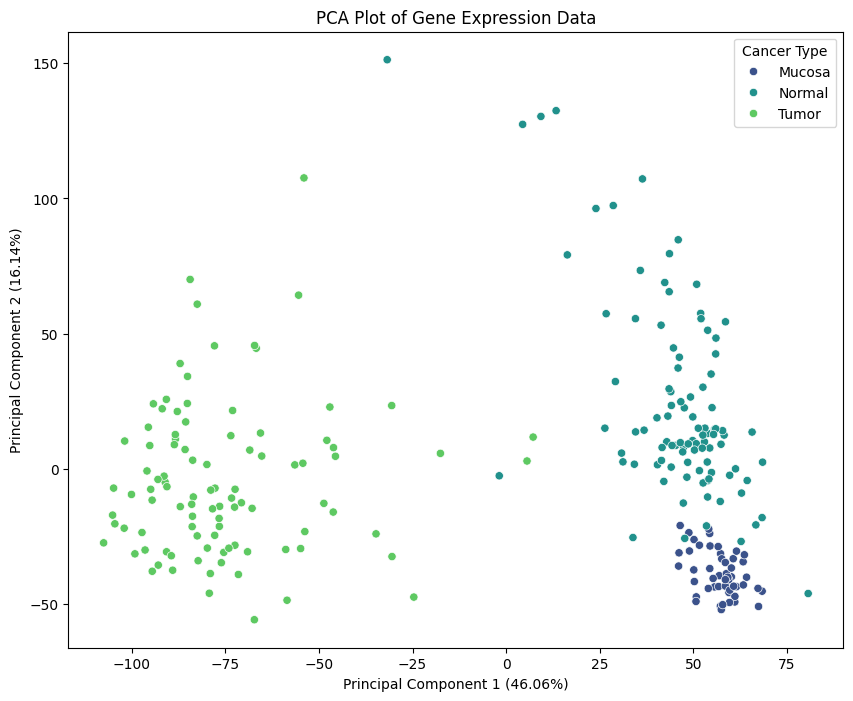

In [49]:
# Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame with PCA-transformed data
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Add the target labels to the DataFrame
pca_df['cancer_type'] = y

# Plot PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cancer_type', data=pca_df, palette='viridis')
plt.title('PCA Plot of Gene Expression Data')
plt.xlabel(f'Principal Component 1 ({round(pca.explained_variance_ratio_[0]*100, 2)}%)')
plt.ylabel(f'Principal Component 2 ({round(pca.explained_variance_ratio_[1]*100, 2)}%)')
plt.legend(title='Cancer Type')
plt.show()


# Cross validation

In [50]:
from sklearn.model_selection import cross_val_score

# Random Forest
rf_scores = cross_val_score(rf_clf,X_train_selected, y_train, cv=5, scoring='accuracy')
print("Random Forest Cross-Validation Scores:", rf_scores)
print("Random Forest Mean Cross-Validation Score: {:.2f}".format(np.mean(rf_scores)))

# SVM
svm_scores = cross_val_score(svm_clf,X_train_selected, y_train, cv=5, scoring='accuracy')
print("SVM Cross-Validation Scores:", svm_scores)
print("SVM Mean Cross-Validation Score: {:.2f}".format(np.mean(svm_scores)))

# Logistic Regression
lr_scores = cross_val_score(lr_clf,X_train_selected, y_train, cv=5, scoring='accuracy')
print("Logistic Regression Cross-Validation Scores:", lr_scores)
print("Logistic Regression Mean Cross-Validation Score: {:.2f}".format(np.mean(lr_scores)))

# KNN
knn_scores = cross_val_score(knn_clf,X_train_selected, y_train, cv=5, scoring='accuracy')
print("KNN Cross-Validation Scores:", knn_scores)
print("KNN Mean Cross-Validation Score: {:.2f}".format(np.mean(knn_scores)))

# XGBoost
xgb_scores = cross_val_score(xgb_clf,X_train_selected, y_train, cv=5, scoring='accuracy')
print("XGBoost Cross-Validation Scores:", xgb_scores)
print("XGBoost Mean Cross-Validation Score: {:.2f}".format(np.mean(xgb_scores)))

# MLP
mlp_scores = cross_val_score(mlp_clf,X_train_selected, y_train, cv=5, scoring='accuracy')
print("MLP Cross-Validation Scores:", mlp_scores)
print("MLP Mean Cross-Validation Score: {:.2f}".format(np.mean(mlp_scores)))

Random Forest Cross-Validation Scores: [0.90322581 0.96774194 0.90322581 1.         1.        ]
Random Forest Mean Cross-Validation Score: 0.95
SVM Cross-Validation Scores: [0.93548387 0.90322581 0.93548387 0.9        0.9       ]
SVM Mean Cross-Validation Score: 0.91
Logistic Regression Cross-Validation Scores: [0.93548387 0.96774194 0.96774194 0.93333333 0.96666667]
Logistic Regression Mean Cross-Validation Score: 0.95
KNN Cross-Validation Scores: [0.90322581 0.87096774 0.93548387 0.96666667 0.93333333]
KNN Mean Cross-Validation Score: 0.92
XGBoost Cross-Validation Scores: [0.93548387 0.90322581 0.93548387 0.93333333 0.96666667]
XGBoost Mean Cross-Validation Score: 0.93
MLP Cross-Validation Scores: [0.96774194 0.96774194 0.96774194 0.93333333 0.96666667]
MLP Mean Cross-Validation Score: 0.96


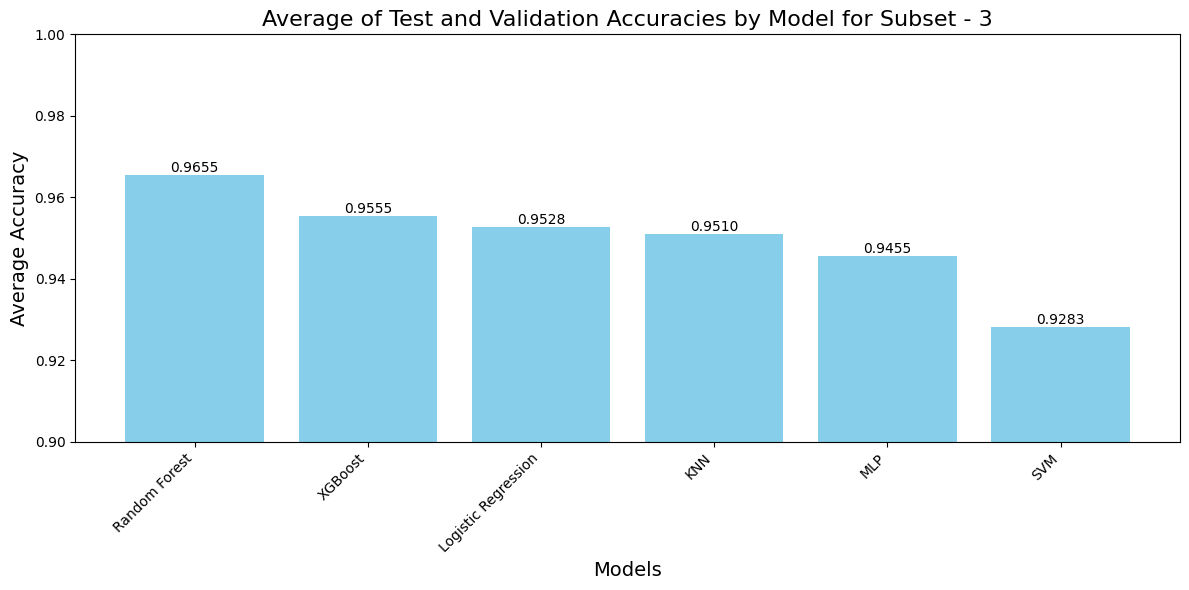

The best performing model is Random Forest with an average accuracy of 0.9655


In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate average accuracies
models = ['Random Forest', 'SVM', 'Logistic Regression', 'KNN', 'XGBoost', 'MLP']
test_accuracies = [accuracy_rf, accuracy_svm, accuracy_lr, accuracy_knn, accuracy_xgb, accuracy_mlp]
val_accuracies = [accuracy_val_rf, accuracy_val_svm, accuracy_val_lr, accuracy_val_knn, accuracy_val_xgb, accuracy_val_mlp]

avg_accuracies = [(test + val) / 2 for test, val in zip(test_accuracies, val_accuracies)]

# Sort models by average accuracy
sorted_indices = np.argsort(avg_accuracies)[::-1]
sorted_models = [models[i] for i in sorted_indices]
sorted_avg_accuracies = [avg_accuracies[i] for i in sorted_indices]

# Create the plot
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_models, sorted_avg_accuracies, color='skyblue')
plt.title('Average of Test and Validation Accuracies by Model for Subset - 3', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Average Accuracy', fontsize=14)
plt.ylim(0.9, 1.0)  # Adjust this range if needed

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('subset3/Average of Test and Validation Accuracies by Model for Subset - 3', dpi=300, bbox_inches='tight')
plt.show() 

# Print the best performing model
best_model = sorted_models[0]
best_accuracy = sorted_avg_accuracies[0]
print(f"The best performing model is {best_model} with an average accuracy of {best_accuracy:.4f}")

In [52]:
import pandas as pd

# Test Set Performance Table
test_data = {
    'Model': ['Random Forest', 'SVM', 'Logistic Regression', 'KNN', 'XGBoost', 'MLP'],
    'Accuracy': [accuracy_rf, accuracy_svm, accuracy_lr, accuracy_knn, accuracy_xgb, accuracy_mlp],
    'Balanced Accuracy': [balanced_accuracy_rf, balanced_accuracy_svm, balanced_accuracy_lr, balanced_accuracy_knn, balanced_accuracy_xgb, balanced_accuracy_mlp],
    'F1-score': [f1_rf, f1_svm, f1_lr, f1_knn, f1_xgb, f1_mlp],
    'Precision': [precision_rf, precision_svm, precision_lr, precision_knn, precision_xgb, precision_mlp],
    'Recall': [recall_rf, recall_svm, recall_lr, recall_knn, recall_xgb, recall_mlp]
}

test_df = pd.DataFrame(test_data)
test_df = test_df.set_index('Model')
test_df = test_df.round(4)  # Round to 4 decimal places for readability

print("Test Set Performance Metrics:")
print(test_df)
print("\n")

# Validation Set Performance Table
val_data = {
    'Model': ['Random Forest', 'SVM', 'Logistic Regression', 'KNN', 'XGBoost', 'MLP'],
    'Accuracy': [accuracy_val_rf, accuracy_val_svm, accuracy_val_lr, accuracy_val_knn, accuracy_val_xgb, accuracy_val_mlp],
    'Balanced Accuracy': [balanced_accuracy_val_rf, balanced_accuracy_val_svm, balanced_accuracy_val_lr, balanced_accuracy_val_knn, balanced_accuracy_val_xgb, balanced_accuracy_val_mlp],
    'F1-score': [f1_val_rf, f1_val_svm, f1_val_lr, f1_val_knn, f1_val_xgb, f1_val_mlp],
    'Precision': [precision_val_rf, precision_val_svm, precision_val_lr, precision_val_knn, precision_val_xgb, precision_val_mlp],
    'Recall': [recall_val_rf, recall_val_svm, recall_val_lr, recall_val_knn, recall_val_xgb, recall_val_mlp]
}

val_df = pd.DataFrame(val_data)
val_df = val_df.set_index('Model')
val_df = val_df.round(6)  # Round to 4 decimal places for readability

print("Validation Set Performance Metrics:")
print(val_df)

Test Set Performance Metrics:
                     Accuracy  Balanced Accuracy  F1-score  Precision  Recall
Model                                                                        
Random Forest            0.96             0.9667    0.9589     0.9530  0.9667
SVM                      0.90             0.9167    0.8909     0.8852  0.9167
Logistic Regression      0.92             0.9167    0.9105     0.9061  0.9167
KNN                      0.96             0.9667    0.9589     0.9530  0.9667
XGBoost                  0.94             0.9333    0.9267     0.9219  0.9333
MLP                      0.92             0.9167    0.9105     0.9061  0.9167


Validation Set Performance Metrics:
                     Accuracy  Balanced Accuracy  F1-score  Precision  \
Model                                                                   
Random Forest        0.971014           0.964286  0.969689   0.976190   
SVM                  0.956522           0.952381  0.951948   0.951940   
Logistic Regress

In [53]:
print("RF predictions:", rf_clf.predict(X_val_selected))
print("LR predictions:", lr_clf.predict(X_val_selected))
print("MLP predictions:", mlp_clf.predict(X_val_selected))

RF predictions: [2 1 1 2 2 2 2 1 2 0 1 1 0 2 0 0 0 2 2 2 0 0 1 1 1 1 2 0 0 1 1 1 2 1 1 0 2
 1 1 2 2 2 1 2 1 1 2 2 0 2 1 2 2 2 1 2 1 0 1 2 2 0 1 2 1 1 1 2 1]
LR predictions: [2 1 1 2 2 2 2 1 2 0 1 1 0 2 0 0 0 2 2 2 0 0 1 1 1 1 2 0 0 1 1 1 2 1 1 0 2
 1 1 2 2 2 1 2 1 1 1 2 0 2 1 2 2 2 1 2 1 0 1 2 2 0 1 2 1 1 1 2 1]
MLP predictions: [2 1 1 2 2 2 2 1 2 0 1 1 0 2 0 0 0 2 2 2 0 0 1 1 1 1 2 0 0 1 1 1 2 1 1 0 2
 1 1 2 2 2 1 2 1 1 2 2 0 2 1 2 2 2 1 2 1 0 1 2 2 0 1 2 1 1 1 2 1]
